## Import the Life table for Canadian men from Human Mortality Database

In [8]:
import pandas as pd
import numpy as np
from scipy.integrate import quad

df = pd.read_csv('../data/mortality_men.csv', sep=';')
df

,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
0,1921,0,0.13825,0.12604,0.30,100000,12604,91167,5602724,56.03
1,1921,1,0.01781,0.01765,0.50,87396,1542,86625,5511557,63.06
2,1921,2,0.00852,0.00848,0.50,85854,728,85490,5424932,63.19
3,1921,3,0.00611,0.00609,0.50,85125,519,84866,5339443,62.72
4,1921,4,0.00474,0.00473,0.50,84607,401,84406,5254577,62.11
...,...,...,...,...,...,...,...,...,...,...
11206,2021,106,0.60085,0.46204,0.50,97,45,75,154,1.59
11207,2021,107,0.63202,0.48026,0.50,52,25,40,79,1.52
11208,2021,108,0.66214,0.49745,0.50,27,13,20,40,1.47
11209,2021,109,0.69099,0.51356,0.50,14,7,10,19,1.42


## Keep only mortality rate for a given year

In [9]:
tab_2021 = df[df['Year']==2021]
tab_2021 = tab_2021[['Age','mx']]
tab_2021=tab_2021.reset_index()
del tab_2021['index']
tab_2021

,Age,mx
0,0,0.00479
1,1,0.00026
2,2,0.00017
3,3,0.00017
4,4,0.00011
...,...,...
106,106,0.60085
107,107,0.63202
108,108,0.66214
109,109,0.69099


## Define a function to calculate qx

In [10]:
def calculate_qx(mx):
    return 2 * mx / (2 + mx)

In [11]:
tab_2021['qx'] = tab_2021['mx'].apply(calculate_qx)
tab_2021

,Age,mx,qx
0,0,0.00479,0.004779
1,1,0.00026,0.000260
2,2,0.00017,0.000170
3,3,0.00017,0.000170
4,4,0.00011,0.000110
...,...,...,...
106,106,0.60085,0.462041
107,107,0.63202,0.480255
108,108,0.66214,0.497449
109,109,0.69099,0.513558


## Initialise lx

In [12]:
tab_2021['lx'] = [100000] + [None] * 110
tab_2021

,Age,mx,qx,lx
0,0,0.00479,0.004779,100000.0
1,1,0.00026,0.000260,NaN
2,2,0.00017,0.000170,NaN
3,3,0.00017,0.000170,NaN
4,4,0.00011,0.000110,NaN
...,...,...,...,...
106,106,0.60085,0.462041,NaN
107,107,0.63202,0.480255,NaN
108,108,0.66214,0.497449,NaN
109,109,0.69099,0.513558,NaN


In [13]:
# Initialize a new DataFrame to store the results
result_df = pd.DataFrame(columns=['Age', 'lx', 'dx'])

# Iterate through each row in the original DataFrame
for index, row in tab_2021.iterrows():
    age = row['Age']
    if age == 0:
        lx = 100000 #initial_survivors
    else:
        # Calculate lx for current age
        lx = result_df.loc[result_df['Age'] == age - 1, 'lx'].values[0] - result_df.loc[result_df['Age'] == age - 1, 'dx'].values[0]
    qx = row['qx']
    dx = lx * qx
    
    # Append the calculated values to the result DataFrame
    result_df = result_df.append({'Age': age, 'lx': lx, 'dx': dx}, ignore_index=True)

# Now, result_df DataFrame contains updated lx and dx values for all ages
tab_2021['lx']=result_df['lx']
tab_2021['dx']=result_df['dx']

C:\Users\Xavier\AppData\Local\Temp\ipykernel_12332\556216698.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Age': age, 'lx': lx, 'dx': dx}, ignore_index=True)
C:\Users\Xavier\AppData\Local\Temp\ipykernel_12332\556216698.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Age': age, 'lx': lx, 'dx': dx}, ignore_index=True)
C:\Users\Xavier\AppData\Local\Temp\ipykernel_12332\556216698.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Age': age, 'lx': lx, 'dx': dx}, ignore_index=True)
C:\Users\Xavier\AppData\Local\Temp\ipykernel_12332\556216698.py:16: FutureWarning: The frame.append method is deprecated and will be removed from

C:\Users\Xavier\AppData\Local\Temp\ipykernel_12332\556216698.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Age': age, 'lx': lx, 'dx': dx}, ignore_index=True)
C:\Users\Xavier\AppData\Local\Temp\ipykernel_12332\556216698.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Age': age, 'lx': lx, 'dx': dx}, ignore_index=True)
C:\Users\Xavier\AppData\Local\Temp\ipykernel_12332\556216698.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Age': age, 'lx': lx, 'dx': dx}, ignore_index=True)


In [14]:
tab_2021

,Age,mx,qx,lx,dx
0,0,0.00479,0.004779,100000.000000,477.855536
1,1,0.00026,0.000260,99522.144464,25.872394
2,2,0.00017,0.000170,99496.272070,16.912929
3,3,0.00017,0.000170,99479.359141,16.910054
4,4,0.00011,0.000110,99462.449088,10.940268
...,...,...,...,...,...
106,106,0.60085,0.462041,96.996757,44.816503
107,107,0.63202,0.480255,52.180253,25.059812
108,108,0.66214,0.497449,27.120441,13.491048
109,109,0.69099,0.513558,13.629393,6.999487


## Calcutale Lx

In [15]:
import pandas as pd

def calculate_Lx(dataframe):
    # Ensure DataFrame is sorted by Age
    dataframe = dataframe.sort_values(by='Age')

    # Calculate Lx for each age
    for index, row in dataframe.iterrows():
        age = row['Age']
        if age == 0:
            # Set Lx at age 0 as the average of Lx at age 0 and age 1
            lx_at_age_0 = (dataframe.loc[dataframe['Age'] == 0, 'lx'].values[0] + dataframe.loc[dataframe['Age'] == 1, 'lx'].values[0]) / 2
            dataframe.at[index, 'Lx'] = lx_at_age_0
        elif age > 0:
            previous_lx = dataframe.loc[dataframe['Age'] == age - 1, 'Lx'].values[0]
            dx = row['dx']
            lx = previous_lx - dx
            dataframe.at[index, 'Lx'] = lx

    return dataframe

# Assuming tab_2021 DataFrame is complete as provided
tab_2021 = calculate_Lx(tab_2021)

In [16]:
tab_2021

,Age,mx,qx,lx,dx,Lx
0,0,0.00479,0.004779,100000.000000,477.855536,99761.072232
1,1,0.00026,0.000260,99522.144464,25.872394,99735.199838
2,2,0.00017,0.000170,99496.272070,16.912929,99718.286909
3,3,0.00017,0.000170,99479.359141,16.910054,99701.376856
4,4,0.00011,0.000110,99462.449088,10.940268,99690.436588
...,...,...,...,...,...,...
106,106,0.60085,0.462041,96.996757,44.816503,291.108021
107,107,0.63202,0.480255,52.180253,25.059812,266.048209
108,108,0.66214,0.497449,27.120441,13.491048,252.557161
109,109,0.69099,0.513558,13.629393,6.999487,245.557675


## Calculate Tx

In [17]:
def calculate_Tx(dataframe):
    # Calculate the total number of person-years lived (Tx) at each age (sum of Lx and subsequent Lx+1, Lx+2, ...)
    dataframe['Tx'] = dataframe['Lx'][::-1].cumsum()[::-1]  # Cumulative sum in reverse order
    return dataframe

# Example usage:
# Assuming tab_2021 DataFrame is complete as provided
tab_2021 = tab_2021.sort_values(by='Age')  # Ensure DataFrame is sorted by Age

# Calculate Tx for all ages
tab_2021 = calculate_Tx(tab_2021)

In [18]:
tab_2021

,Age,mx,qx,lx,dx,Lx,Tx
0,0,0.00479,0.004779,100000.000000,477.855536,99761.072232,7.905071e+06
1,1,0.00026,0.000260,99522.144464,25.872394,99735.199838,7.805310e+06
2,2,0.00017,0.000170,99496.272070,16.912929,99718.286909,7.705575e+06
3,3,0.00017,0.000170,99479.359141,16.910054,99701.376856,7.605857e+06
4,4,0.00011,0.000110,99462.449088,10.940268,99690.436588,7.506155e+06
...,...,...,...,...,...,...,...
106,106,0.60085,0.462041,96.996757,44.816503,291.108021,1.297324e+03
107,107,0.63202,0.480255,52.180253,25.059812,266.048209,1.006216e+03
108,108,0.66214,0.497449,27.120441,13.491048,252.557161,7.401682e+02
109,109,0.69099,0.513558,13.629393,6.999487,245.557675,4.876110e+02


## Calculate the Life expectancy

In [19]:
def calculate_life_expectancy(dataframe):
    # Calculate the life expectancy (ex) at each age (Tx / Lx)
    dataframe['ex'] = dataframe['Tx'] / dataframe['Lx']
    return dataframe

# Example usage:
# Assuming tab_2021 DataFrame is complete as provided
tab_2021 = tab_2021.sort_values(by='Age')  # Ensure DataFrame is sorted by Age

# Calculate life expectancy (ex) for all ages
tab_2021 = calculate_life_expectancy(tab_2021)

In [20]:
tab_2021

,Age,mx,qx,lx,dx,Lx,Tx,ex
0,0,0.00479,0.004779,100000.000000,477.855536,99761.072232,7.905071e+06,79.240039
1,1,0.00026,0.000260,99522.144464,25.872394,99735.199838,7.805310e+06,78.260336
2,2,0.00017,0.000170,99496.272070,16.912929,99718.286909,7.705575e+06,77.273440
3,3,0.00017,0.000170,99479.359141,16.910054,99701.376856,7.605857e+06,76.286376
4,4,0.00011,0.000110,99462.449088,10.940268,99690.436588,7.506155e+06,75.294638
...,...,...,...,...,...,...,...,...
106,106,0.60085,0.462041,96.996757,44.816503,291.108021,1.297324e+03,4.456505
107,107,0.63202,0.480255,52.180253,25.059812,266.048209,1.006216e+03,3.782083
108,108,0.66214,0.497449,27.120441,13.491048,252.557161,7.401682e+02,2.930696
109,109,0.69099,0.513558,13.629393,6.999487,245.557675,4.876110e+02,1.985729


## Get life expectancy at a given age

In [21]:
def get_life_expectancy_for_age(dataframe, age):
    # Filter the DataFrame for the given age
    age_row = dataframe[dataframe['Age'] == age]
    
    # Check if the age exists in the DataFrame
    if not age_row.empty:
        # Extract the life expectancy (ex) value for the given age
        life_expectancy = age_row['ex'].values[0]
        return life_expectancy
    else:
        print(f"No data found for age {age}")
        return None

In [22]:
# Example usage:
# Assuming tab_2021 DataFrame is complete as provided
# Assuming you want to get the life expectancy for age 65
life_expectancy_age_65 = get_life_expectancy_for_age(tab_2021, 65)
if life_expectancy_age_65 is not None:
    print(f"Life expectancy at age 65: {life_expectancy_age_65}")

Life expectancy at age 65: 19.343591971671415


## --------------------------------

##  Xavier

## --------------------------------

### Get Survivor function 
$ S_t = S_{t-1} * (1-h_t) $

In [23]:
def get_survivor_fct(dataframe):
    
    dataframe = dataframe.sort_values(by='Age')
    St=None
    
    for index, row in dataframe.iterrows():
        age = row['Age']
        prop_surv=1-(row['qx'])
        if age>0:
            St*=prop_surv
        else:
            St=prop_surv
        dataframe.at[index,'St']=St
        #dataframe.at[index,'PropSurv']=prop_surv
    return dataframe

tab_2021 = get_survivor_fct(tab_2021)

### Get expected lifespan from S(t)
$ e=\sum S_t $

In [24]:
def get_exp_ls(dataframe):
    dataframe = dataframe.sort_values(by='Age')
    dataframe['exp_ls']=dataframe['St'][::-1].cumsum() 
    return dataframe
tab_2021=get_exp_ls(tab_2021)

### Get expected lifespan from lx and dx
$ e=\frac{\sum lx}{\sum dx} $   where   $lx_t=lx_{t-1}-dx_{t-1}$ and $dx_t=lx_t * qx_t$

In [25]:
def get_exp_ls_2(dataframe):
    surv=dataframe['lx'][::-1].cumsum()
    dead=dataframe['dx'][::-1].cumsum()
    dataframe['exp_ls2']=surv/(dead)
    return dataframe
tab_2021=get_exp_ls_2(tab_2021)

### Compare expected lifespans
#### At specific age

In [26]:
def retrieve(dataframe,age):
    age_row=dataframe[dataframe['Age']==age]
    exp=age_row['exp_ls'].values[0]
    ex=age_row['ex'].values[0]
    st_dt=age_row['exp_ls2'].values[0]
    return exp, ex, st_dt
age=65
exp,ex,st_dt=retrieve(tab_2021,age)
print("Expected lifespan at age", age, "by:")
print("Sum St = ", round(exp,2))
print("Tx/Lx = ", round(ex,2))
print("Sum(lx) / Sum(dx) = ", round(st_dt,2))

Expected lifespan at age 65 by:
Sum St =  16.24
Tx/Lx =  19.34
Sum(lx) / Sum(dx) =  20.03


#### Over whole lifespan

In [27]:
def compare(dataframe,age):

    comparisons={}
    for sel_age in age:
        comparisons[sel_age]={
            "St" : dataframe.loc[dataframe['Age']==sel_age,'exp_ls'].values[0],
            "Tx/Lx" : dataframe.loc[dataframe['Age']==sel_age,'ex'].values[0],
            "St2/Dt" : dataframe.loc[dataframe['Age']==sel_age,'exp_ls2'].values[0]
        }
    return comparisons

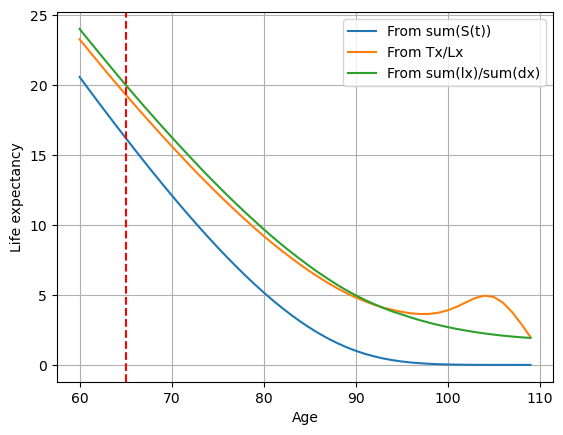

In [29]:
import matplotlib.pyplot as plt

all_age=list(range(60,110))

compare_results=compare(tab_2021,all_age)

life_exp=list(compare_results.keys())
st=[compare_results[t]["St"] for t in all_age]
Tx=[compare_results[t]["Tx/Lx"] for t in all_age]
st2=[compare_results[t]["St2/Dt"] for t in all_age]

plt.plot(all_age, st, label="From sum(S(t))")
plt.plot(all_age, Tx, label="From Tx/Lx")
plt.plot(all_age, st2, label="From sum(lx)/sum(dx)")
plt.xlabel('Age')
plt.ylabel('Life expectancy')
plt.legend()
plt.grid(True)
plt.axvline(x=65, color='red', linestyle='--')
plt.show()
